In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Table of Contents:

# Part I: Cleaning the Data

# Part II: Logistic Regression Model

# Part III: Random Forest Model (the model that will be chosen for further parts)

# Part IV: Choosing the Model

# Part V: Prediction (Random Forest Model)

# Part VI: Recommendations

In [4]:
vis=pd.read_csv('visitors_carnival.csv')
vis.head()

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec


In [5]:
vis.describe()

,ID,Household_Size,Age_18_34,Distance_to_Park,Children_Present
count,1000.000000,994.000000,995.000000,995.000000,995.000000
mean,500.500000,3.058350,50.179899,49.536392,0.300503
std,288.819436,1.154097,29.255978,28.367000,0.458707
min,1.000000,1.000000,0.000000,1.060000,0.000000
25%,250.750000,2.000000,23.500000,25.030000,0.000000
50%,500.500000,3.000000,51.000000,48.920000,0.000000
75%,750.250000,4.000000,76.000000,74.030000,1.000000
max,1000.000000,5.000000,99.000000,99.960000,1.000000


Here the table shows that the dataset has missing values (count row).

In [7]:
vis.dtypes

ID                      int64
Household_Size        float64
Age_18_34             float64
Income_Level           object
Distance_to_Park      float64
Weather_Tolerance      object
Activity_Interest      object
Children_Present      float64
Preferred_Activity     object
HomeState              object
dtype: object

Categorical Values: ID, Income_Level, Weather_Tolerance, Activity_Interest, Children_Present, Prefered_Activity, HomeState

Numeric Values: Household_Size, Age_18_34, Distance_to_Park

# Part I: Cleaning the data

# Fixing N/As

In [11]:
vis.isna().sum()

ID                    0
Household_Size        6
Age_18_34             5
Income_Level          7
Distance_to_Park      5
Weather_Tolerance     6
Activity_Interest     9
Children_Present      5
Preferred_Activity    7
HomeState             0
dtype: int64

The result of the function above shows that in total the dataset has missing values (50) in 8 columns. Therefore, it is essential to handle these missing values before proceeding with model training.

In [13]:
vis_na = vis[vis.isna().any(axis=1)]
vis_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
17,18,3.0,56.0,High,41.05,High,NaN,0.0,Indoor,Maine
23,24,3.0,97.0,NaN,33.91,High,Holiday shows,0.0,Outdoor,Maine
30,31,NaN,3.0,Low,20.70,Moderate,Ice skating,0.0,Indoor,Maine
43,44,5.0,62.0,Low,40.96,NaN,Holiday shows,0.0,Outdoor,New Hampshire
58,59,1.0,47.0,NaN,8.48,High,Holiday shows,1.0,Indoor,Maine
75,76,4.0,NaN,High,86.74,Moderate,Holiday shows,0.0,Indoor,Quebec
106,107,3.0,39.0,High,72.62,High,Ice skating,NaN,Indoor,Quebec
143,144,3.0,56.0,NaN,54.29,High,Craft fairs,1.0,Indoor,Quebec
154,155,5.0,61.0,Low,44.81,Low,Holiday shows,NaN,Outdoor,New Hampshire
174,175,NaN,63.0,Low,7.98,High,Ice skating,0.0,Outdoor,Maine


# 1. Activity Interest Column

In [15]:
vis['Activity_Interest'].unique()

array(['Ice skating', 'Craft fairs', 'Outdoor concerts', 'Holiday shows',
       nan], dtype=object)

Decided to remove rows with N/As from Activity_Interest Column because was not found a solution which values to input.

So, as this column has 9 N/A values, after removing the dataset will have 991 rows.

In [17]:
vis = vis.dropna(subset=['Activity_Interest'])
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [18]:
vis.isna().sum()

ID                    0
Household_Size        6
Age_18_34             5
Income_Level          7
Distance_to_Park      4
Weather_Tolerance     6
Activity_Interest     0
Children_Present      5
Preferred_Activity    7
HomeState             0
dtype: int64

# 2. Distance to Park column

In [20]:
vis_dist_na = vis[vis['Distance_to_Park'].isna()]
vis_dist_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
244,245,1.0,76.0,High,NaN,Moderate,Holiday shows,1.0,Indoor,Connecticut
347,348,1.0,37.0,Medium,NaN,Moderate,Ice skating,1.0,Indoor,Rhode Island
424,425,1.0,98.0,Low,NaN,Moderate,Ice skating,0.0,Outdoor,Rhode Island
844,845,2.0,94.0,Medium,NaN,Low,Craft fairs,1.0,Indoor,Connecticut


Using Google Maps was determined the approximate distance between Hartford (Connecticut) and Portland (Lobster Land) which is 200 miles and Newport (Rhode Island) to Portlad (Lobstarland) which is 187 miles.

In [22]:
vis.loc[vis['HomeState'] == 'Connecticut', 'Distance_to_Park'] = 200
vis.loc[vis['HomeState'] == 'Rhode Island', 'Distance_to_Park'] = 187
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [23]:
connecticut_vis = vis[vis['HomeState'] == 'Connecticut']
connecticut_vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
244,245,1.0,76.0,High,200.0,Moderate,Holiday shows,1.0,Indoor,Connecticut
844,845,2.0,94.0,Medium,200.0,Low,Craft fairs,1.0,Indoor,Connecticut


In [24]:
rh_vis = vis[vis['HomeState'] == 'Rhode Island']
rh_vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
347,348,1.0,37.0,Medium,187.0,Moderate,Ice skating,1.0,Indoor,Rhode Island
424,425,1.0,98.0,Low,187.0,Moderate,Ice skating,0.0,Outdoor,Rhode Island


In [25]:
vis.isna().sum()

ID                    0
Household_Size        6
Age_18_34             5
Income_Level          7
Distance_to_Park      0
Weather_Tolerance     6
Activity_Interest     0
Children_Present      5
Preferred_Activity    7
HomeState             0
dtype: int64

# 3. Preferred Activity Column

In [27]:
vis_act_na = vis[vis['Preferred_Activity'].isna()]
vis_act_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
234,235,2.0,65.0,Medium,39.71,Low,Holiday shows,0.0,NaN,Maine
324,325,5.0,97.0,High,78.41,High,Outdoor concerts,0.0,NaN,Ontario
401,402,5.0,16.0,Low,10.40,Moderate,Craft fairs,1.0,NaN,Maine
529,530,4.0,53.0,High,44.53,Low,Ice skating,1.0,NaN,New Hampshire
678,679,5.0,17.0,Low,80.34,Moderate,Holiday shows,0.0,NaN,Ontario
843,844,5.0,61.0,High,41.37,Low,Outdoor concerts,0.0,NaN,Maine
991,992,4.0,15.0,High,21.90,Moderate,Holiday shows,0.0,NaN,Maine


Looking at each option from Activity Interest and its Prefered Activity by using gropby function, the highest option (Indoor, Outdoor) was chosen and used instead of N/A

In [29]:
ice = vis[vis['Activity_Interest'] == 'Ice skating']
ice.groupby('Preferred_Activity').size()

Preferred_Activity
Indoor     102
Outdoor    149
dtype: int64

In [30]:
vis.loc[(vis['Activity_Interest'] == 'Ice skating') & (vis['Preferred_Activity'].isna()), 'Preferred_Activity'] = 'Outdoor'
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [31]:
out = vis[vis['Activity_Interest'] == 'Outdoor concerts']
out.groupby('Preferred_Activity').size()

Preferred_Activity
Indoor      76
Outdoor    172
dtype: int64

In [32]:
vis.loc[(vis['Activity_Interest'] == 'Outdoor concerts') & (vis['Preferred_Activity'].isna()), 'Preferred_Activity'] = 'Outdoor'
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [33]:
cr = vis[vis['Activity_Interest'] == 'Craft fairs']
cr.groupby('Preferred_Activity').size()

Preferred_Activity
Indoor     132
Outdoor    111
dtype: int64

In [34]:
vis.loc[(vis['Activity_Interest'] == 'Craft fairs') & (vis['Preferred_Activity'].isna()), 'Preferred_Activity'] = 'Indoor'
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [35]:
hol = vis[vis['Activity_Interest'] == 'Holiday shows']
hol.groupby('Preferred_Activity').size()

Preferred_Activity
Indoor     123
Outdoor    119
dtype: int64

In [36]:
vis.loc[(vis['Activity_Interest'] == 'Holiday shows') & (vis['Preferred_Activity'].isna()), 'Preferred_Activity'] = 'Indoor'
vis

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,Indoor,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,Indoor,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,Indoor,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,Indoor,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,Indoor,Quebec
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,65.0,High,44.77,High,Holiday shows,0.0,Outdoor,New Hampshire
996,997,5.0,95.0,Low,34.11,Low,Holiday shows,0.0,Outdoor,Vermont
997,998,2.0,6.0,Medium,40.06,Moderate,Craft fairs,1.0,Indoor,Maine
998,999,5.0,5.0,Low,53.46,High,Ice skating,0.0,Indoor,Ontario


In [37]:
vis_act_na = vis[vis['Preferred_Activity'].isna()]
vis_act_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState


In [38]:
vis.isna().sum()

ID                    0
Household_Size        6
Age_18_34             5
Income_Level          7
Distance_to_Park      0
Weather_Tolerance     6
Activity_Interest     0
Children_Present      5
Preferred_Activity    0
HomeState             0
dtype: int64

# 4. Children_Present Column

In [40]:
vis_ch_na = vis[vis['Children_Present'].isna()]
vis_ch_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
106,107,3.0,39.0,High,72.62,High,Ice skating,NaN,Indoor,Quebec
154,155,5.0,61.0,Low,44.81,Low,Holiday shows,NaN,Outdoor,New Hampshire
859,860,1.0,72.0,Low,83.53,High,Holiday shows,NaN,Outdoor,Ontario
866,867,2.0,4.0,Medium,41.90,Moderate,Holiday shows,NaN,Indoor,New Hampshire
873,874,3.0,84.0,Medium,82.90,Low,Craft fairs,NaN,Indoor,Ontario


For IDs 107 and 155 was decided to use Children_Present with value 1 (have children). 

ID107: As the Proportion for Age 18-34 equals 39, it is possible to consider that there is a family consists with two parents that are out of range, one person (their kid) is between this range, and he can probably have the brother/sister that is below 18 years old.

ID155: A big family that probably has several generations in one house (based on their low income, they cannot afford to buy another property), so there is a big chance that they have children.

Other IDs will have 0 - do not have children

In [42]:
vis.loc[vis['ID'].isin([107, 155]), 'Children_Present'] = 1
vis.loc[vis['ID'].isin([860, 867, 874]), 'Children_Present'] = 0

In [43]:
vis[vis['ID'] == 155]

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
154,155,5.0,61.0,Low,44.81,Low,Holiday shows,1.0,Outdoor,New Hampshire


In [44]:
vis[vis['ID'] == 860]

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
859,860,1.0,72.0,Low,83.53,High,Holiday shows,0.0,Outdoor,Ontario


In [45]:
vis.isna().sum()

ID                    0
Household_Size        6
Age_18_34             5
Income_Level          7
Distance_to_Park      0
Weather_Tolerance     6
Activity_Interest     0
Children_Present      0
Preferred_Activity    0
HomeState             0
dtype: int64

# 5. Household_Size Column

In [47]:
vis_hou_na = vis[vis['Household_Size'].isna()]
vis_hou_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
30,31,NaN,3.0,Low,20.70,Moderate,Ice skating,0.0,Indoor,Maine
174,175,NaN,63.0,Low,7.98,High,Ice skating,0.0,Outdoor,Maine
224,225,NaN,41.0,Low,17.41,Moderate,Ice skating,0.0,Indoor,Maine
745,746,NaN,48.0,Medium,22.03,Low,Holiday shows,1.0,Indoor,Vermont
921,922,NaN,0.0,Medium,40.62,High,Craft fairs,0.0,Outdoor,New Hampshire
994,995,NaN,75.0,Low,49.76,Low,Outdoor concerts,1.0,Outdoor,New Hampshire


To decide the size of the Household were used two columns Children_Present and Age_18_34

ID31: as the Proportion of Age is too low and they do not have children the HousholdSize is 2

ID175: Age Proportion is 63, no children - the Household Size is 3 (two people in range)

ID225: Age Proportion = 41, no Children. The Houzehold size is 5

ID746: Age Proportion 48, have kids. Household is 2 (one parent in range)

ID922: Age Proportion is 0, no children, Household size is 1

ID995: Age Proportion 75, have children, Househild Size is 4 (3 people in range)


In [49]:
vis.loc[vis['ID'] == 31, 'Household_Size'] = 2

vis.loc[vis['ID'] == 175, 'Household_Size'] = 3

vis.loc[vis['ID'] == 225, 'Household_Size'] = 5

vis.loc[vis['ID'] == 746, 'Household_Size'] = 2

vis.loc[vis['ID'] == 922, 'Household_Size'] = 1

vis.loc[vis['ID'] == 995, 'Household_Size'] = 4


In [50]:
vis[vis['ID'] == 31]

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
30,31,2.0,3.0,Low,20.7,Moderate,Ice skating,0.0,Indoor,Maine


In [51]:
vis.isna().sum()

ID                    0
Household_Size        0
Age_18_34             5
Income_Level          7
Distance_to_Park      0
Weather_Tolerance     6
Activity_Interest     0
Children_Present      0
Preferred_Activity    0
HomeState             0
dtype: int64

# 6. Age_18_34

In [53]:
vis_age_na = vis[vis['Age_18_34'].isna()]
vis_age_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
75,76,4.0,NaN,High,86.74,Moderate,Holiday shows,0.0,Indoor,Quebec
444,445,4.0,NaN,Medium,98.13,Moderate,Outdoor concerts,0.0,Outdoor,Quebec
582,583,3.0,NaN,Medium,36.78,High,Craft fairs,1.0,Outdoor,New Hampshire
670,671,2.0,NaN,Medium,24.51,Moderate,Craft fairs,0.0,Outdoor,Maine
891,892,4.0,NaN,Medium,53.60,Low,Holiday shows,1.0,Indoor,Quebec


The N/As in Age_18_34 Column were replaced with the average number depending on the Income Level

In [55]:
vis.groupby('Income_Level')['Age_18_34'].mean()

Income_Level
High      54.841584
Low       50.304795
Medium    48.191753
Name: Age_18_34, dtype: float64

In [56]:
vis.loc[vis['ID'].isin([445, 583, 671, 892]), 'Age_18_34'] = 48
vis.loc[vis['ID'].isin([76]), 'Age_18_34'] = 55

In [57]:
vis[vis['ID'] == 76]

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
75,76,4.0,55.0,High,86.74,Moderate,Holiday shows,0.0,Indoor,Quebec


In [58]:
vis_na = vis[vis.isna().any(axis=1)]
vis_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
23,24,3.0,97.0,NaN,33.91,High,Holiday shows,0.0,Outdoor,Maine
43,44,5.0,62.0,Low,40.96,NaN,Holiday shows,0.0,Outdoor,New Hampshire
58,59,1.0,47.0,NaN,8.48,High,Holiday shows,1.0,Indoor,Maine
143,144,3.0,56.0,NaN,54.29,High,Craft fairs,1.0,Indoor,Quebec
190,191,1.0,6.0,Low,31.47,NaN,Ice skating,0.0,Indoor,New Hampshire
352,353,4.0,43.0,NaN,90.88,Moderate,Ice skating,0.0,Indoor,Ontario
376,377,4.0,44.0,NaN,76.32,Moderate,Holiday shows,1.0,Indoor,Ontario
565,566,3.0,42.0,Low,72.78,NaN,Outdoor concerts,0.0,Outdoor,Quebec
742,743,4.0,76.0,Low,75.95,NaN,Craft fairs,0.0,Outdoor,Quebec
897,898,4.0,18.0,Low,83.46,NaN,Ice skating,0.0,Indoor,Quebec


# 7. Weather Tolerance Column

In [60]:
vis.groupby('Weather_Tolerance')['HomeState'].count()

Weather_Tolerance
High        277
Low         298
Moderate    410
Name: HomeState, dtype: int64

Can be used Moderate insead of N/A as a Medium Level. Also because it is the most frequent option in the dataset

In [62]:
vis['Weather_Tolerance'] = vis['Weather_Tolerance'].fillna('Moderate')
vis[vis['ID']==44]

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
43,44,5.0,62.0,Low,40.96,Moderate,Holiday shows,0.0,Outdoor,New Hampshire


In [63]:
vis_na = vis[vis.isna().any(axis=1)]
vis_na

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
23,24,3.0,97.0,NaN,33.91,High,Holiday shows,0.0,Outdoor,Maine
58,59,1.0,47.0,NaN,8.48,High,Holiday shows,1.0,Indoor,Maine
143,144,3.0,56.0,NaN,54.29,High,Craft fairs,1.0,Indoor,Quebec
352,353,4.0,43.0,NaN,90.88,Moderate,Ice skating,0.0,Indoor,Ontario
376,377,4.0,44.0,NaN,76.32,Moderate,Holiday shows,1.0,Indoor,Ontario
912,913,4.0,99.0,NaN,1.63,Moderate,Holiday shows,0.0,Indoor,Maine
934,935,2.0,67.0,NaN,31.41,Moderate,Ice skating,1.0,Outdoor,Maine


# 8. Income Level Column

Was decided to Remove the rows with N/A due to difficulty of predicting the options

In [66]:
vis.groupby('Income_Level').count()

,ID,Household_Size,Age_18_34,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
Income_Level,,,,,,,,,
High,203,203,203,203,203,203,203,203,203
Low,292,292,292,292,292,292,292,292,292
Medium,489,489,489,489,489,489,489,489,489


As the 'Medium' Income Level is the most popular in the dataset, it was used instead of missing values in the column

In [68]:
vis['Income_Level'] = vis['Income_Level'].fillna('Medium')


In [69]:
vis.isna().sum()

ID                    0
Household_Size        0
Age_18_34             0
Income_Level          0
Distance_to_Park      0
Weather_Tolerance     0
Activity_Interest     0
Children_Present      0
Preferred_Activity    0
HomeState             0
dtype: int64

As the dataset does not have any missing values, can proceed to the next part

# Part II: Logistic Regression Model

In [72]:
vis['Preferred_Activity'] = LabelEncoder().fit_transform(vis['Preferred_Activity'])
vis.head()

,ID,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
0,1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,0,Ontario
1,2,5.0,54.0,Low,79.87,High,Ice skating,0.0,0,Quebec
2,3,4.0,87.0,High,25.80,High,Craft fairs,1.0,0,New Hampshire
3,4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,0,Ontario
4,5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,0,Quebec


In [73]:
vis.set_index('ID', inplace=True)
vis.head()

,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
ID,,,,,,,,,
1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,0,Ontario
2,5.0,54.0,Low,79.87,High,Ice skating,0.0,0,Quebec
3,4.0,87.0,High,25.80,High,Craft fairs,1.0,0,New Hampshire
4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,0,Ontario
5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,0,Quebec


Since the target variable (Preferred_Activity) has only two distinct categories, like 'Indoor' and "Outdoor', they were treated as a binary classification problem. In this case:

1) The Preferred_Activity column now has 0 and 1 - 0 for "Indoor" and 1 for 'Outdoor'.
2) This binary encoding (0 and 1) is used to train both the Random Forest model and the Logistic Regression model. In both models, the goal is to predict the likelihood of a household's preference for either indoor or outdoor activities based on the other features in the dataset.

In [75]:
vis.head()

,Household_Size,Age_18_34,Income_Level,Distance_to_Park,Weather_Tolerance,Activity_Interest,Children_Present,Preferred_Activity,HomeState
ID,,,,,,,,,
1,3.0,18.0,Low,67.60,Moderate,Ice skating,0.0,0,Ontario
2,5.0,54.0,Low,79.87,High,Ice skating,0.0,0,Quebec
3,4.0,87.0,High,25.80,High,Craft fairs,1.0,0,New Hampshire
4,3.0,73.0,Low,62.86,Low,Ice skating,0.0,0,Ontario
5,2.0,80.0,Low,57.60,Low,Craft fairs,0.0,0,Quebec


First step is to check the nymeric variables on multicollinearity. If the correlation is high these metrics will not be in the model. 

In [77]:
vis_num = vis.drop(columns=['Income_Level', 'Weather_Tolerance', 
                            'Activity_Interest', 'Preferred_Activity', 'HomeState', 'Children_Present'], errors='ignore')
vis_num.corr()

,Household_Size,Age_18_34,Distance_to_Park
Household_Size,1.000000,0.047274,-0.059209
Age_18_34,0.047274,1.000000,0.007630
Distance_to_Park,-0.059209,0.007630,1.000000


No high correlations, so no multicollinearity

The dataset needs to be dummified because the model can work only with numeric data. So only Categorical data will be dummified.

In [80]:
vis.columns

Index(['Household_Size', 'Age_18_34', 'Income_Level', 'Distance_to_Park',
       'Weather_Tolerance', 'Activity_Interest', 'Children_Present',
       'Preferred_Activity', 'HomeState'],
      dtype='object')

In [81]:
vis_d2 = pd.get_dummies(vis, drop_first=True,
                      columns=['Income_Level',
                               'Weather_Tolerance', 'Activity_Interest', 'HomeState', 'Children_Present']).astype('int')
vis_d2.head()

,Household_Size,Age_18_34,Distance_to_Park,Preferred_Activity,Income_Level_Low,Income_Level_Medium,Weather_Tolerance_Low,Weather_Tolerance_Moderate,Activity_Interest_Holiday shows,Activity_Interest_Ice skating,Activity_Interest_Outdoor concerts,HomeState_Maine,HomeState_Massachusetts,HomeState_New Hampshire,HomeState_Ontario,HomeState_Quebec,HomeState_Rhode Island,HomeState_Vermont,Children_Present_1.0
ID,,,,,,,,,,,,,,,,,,,
1,3,18,67,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,5,54,79,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,4,87,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,3,73,62,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
5,2,80,57,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
vis_d2.groupby('Preferred_Activity').mean()

,Household_Size,Age_18_34,Distance_to_Park,Income_Level_Low,Income_Level_Medium,Weather_Tolerance_Low,Weather_Tolerance_Moderate,Activity_Interest_Holiday shows,Activity_Interest_Ice skating,Activity_Interest_Outdoor concerts,HomeState_Maine,HomeState_Massachusetts,HomeState_New Hampshire,HomeState_Ontario,HomeState_Quebec,HomeState_Rhode Island,HomeState_Vermont,Children_Present_1.0
Preferred_Activity,,,,,,,,,,,,,,,,,,
0,3.096110,49.089245,50.686499,0.295195,0.482838,0.306636,0.471396,0.288330,0.233410,0.173913,0.345538,0.137300,0.116705,0.171625,0.180778,0.002288,0.041190,0.391304
1,3.027076,51.241877,48.722022,0.294224,0.514440,0.296029,0.379061,0.214801,0.270758,0.314079,0.348375,0.124549,0.099278,0.155235,0.202166,0.001805,0.068592,0.232852


Children Pressent might be impactful variable because for example for Indoor Activity 40% of the families have children while 60% do not have. For Outdoor 23% do have children and 77% do not have. This can mean that many families do not have children. So, the focus should be made on families with no kids.

Household Size shows that each Preferred Activity has 3 people in average (children are not included).

Age Proporting is 50, meaning that not other 50 percent of the visitors are older than 34 (children are not included).

'Distance to Park' is 50 miles. So, this value shows that probably many visitors are from Maine - same state where the Lobster Land is.

'HomeState' confirms the previous statement. 35% for both Outdoor and Indoor have people from Maine while the closest States in this metric have from around 10-20%.

Families with High income (20%) are the least comparing with Moderate (50%) and Low (30%). However, this distribution shows that the park keeps every segment, that enables to moderate high revenue.

More families are comfortable with average or mild weather conditions - 47% for Indoor and 37% for Outdoor. However, families with High tolerance prefer Outdoor Activities more than Indoor: 33% vs 23%. This only emphasizes that people with such tolerance are ready to spend time outside regardles of the weather.

Also there is a big difference in 'Activity interest: Outdoor Concerts'. 'Outdoor' has higher percentage 31%, than 'Indoor' 17%. 


In [84]:
vis_d2.columns

Index(['Household_Size', 'Age_18_34', 'Distance_to_Park', 'Preferred_Activity',
       'Income_Level_Low', 'Income_Level_Medium', 'Weather_Tolerance_Low',
       'Weather_Tolerance_Moderate', 'Activity_Interest_Holiday shows',
       'Activity_Interest_Ice skating', 'Activity_Interest_Outdoor concerts',
       'HomeState_Maine', 'HomeState_Massachusetts', 'HomeState_New Hampshire',
       'HomeState_Ontario', 'HomeState_Quebec', 'HomeState_Rhode Island',
       'HomeState_Vermont', 'Children_Present_1.0'],
      dtype='object')

In [85]:
X2=vis_d2[['Household_Size', 'Age_18_34', 'Distance_to_Park', 'Children_Present_1.0',
       'Income_Level_Low', 'Income_Level_Medium',
       'Weather_Tolerance_Low', 'Weather_Tolerance_Moderate',
       'Activity_Interest_Holiday shows', 'Activity_Interest_Ice skating',
       'Activity_Interest_Outdoor concerts', 'HomeState_Maine',
       'HomeState_Massachusetts', 'HomeState_New Hampshire',
       'HomeState_Ontario', 'HomeState_Quebec', 'HomeState_Rhode Island',
       'HomeState_Vermont']]
y2=vis_d2.Preferred_Activity

X2_train, X2_test, y2_train, y2_test= train_test_split(X2,y2, test_size = 0.4, random_state = 654)


Before building Logistic Regression model it is important to remove the variables that do not impact the model. The values below with high p-value will be removed. 

If at least one option in categorical variable will have high p-value, the entire category will be removed.

In [87]:
logit_model = sm.Logit(y2_train, sm.add_constant(X2_train))
log = logit_model.fit()
print(log.summary())

         Current function value: 0.632413
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     Preferred_Activity   No. Observations:                  594
Model:                          Logit   Df Residuals:                      575
Method:                           MLE   Df Model:                           18
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                 0.06520
Time:                        18:17:36   Log-Likelihood:                -375.65
converged:                      False   LL-Null:                       -401.86
Covariance Type:            nonrobust   LLR p-value:                 3.241e-05
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -17.1968   1.61e+04     -0.001      0.999   -3.15e+04    3.

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
X_train_reduced = X2_train.drop(columns=[
    'Household_Size',
    'Age_18_34',
    'Distance_to_Park',
    'Income_Level_High',
    'Income_Level_Low',
    'Income_Level_Medium',
    'Activity_Interest_Craft_fairs',
    'Activity_Interest_Holiday shows',
    'Activity_Interest_Ice skating',
    'Activity_Interest_Outdoor concerts',
    'HomeState_Connecticut',
    'HomeState_Vermont',
    'HomeState_Rhode Island',
    'HomeState_Quebec',
    'HomeState_Ontario',
    'HomeState_New Hampshire',
    'HomeState_Massachusetts',
    'HomeState_Maine'], errors='ignore')

X_test_reduced = X2_test.drop(columns=[
    'Household_Size',
    'Age_18_34',
    'Distance_to_Park',
    'Income_Level_High',
    'Income_Level_Low',
    'Income_Level_Medium',
    'Activity_Interest_Craft_fairs',
    'Activity_Interest_Holiday shows',
    'Activity_Interest_Ice skating',
    'Activity_Interest_Outdoor concerts',
    'HomeState_Connecticut',
    'HomeState_Vermont',
    'HomeState_Rhode Island',
    'HomeState_Quebec',
    'HomeState_Ontario',
    'HomeState_New Hampshire',
    'HomeState_Massachusetts',
    'HomeState_Maine'
], errors='ignore')

model = sm.Logit(y2_train, sm.add_constant(X_train_reduced))
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.658490
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     Preferred_Activity   No. Observations:                  594
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                 0.02666
Time:                        18:17:36   Log-Likelihood:                -391.14
converged:                       True   LL-Null:                       -401.86
Covariance Type:            nonrobust   LLR p-value:                 8.583e-05
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.0029      0.184      5.446      0.000      

Now when the summary statistics does shows high p-values, Logistic Regression model can be built.

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train_reduced, y2_train)

LogisticRegression()

In [91]:
pred_log = logmodel.predict(X_train_reduced)
accuracy_score(y2_train, pred_log)

0.5959595959595959

In [92]:
pred_log2 = logmodel.predict(X_test_reduced)
accuracy_score(y2_test, pred_log2)

0.5768261964735516

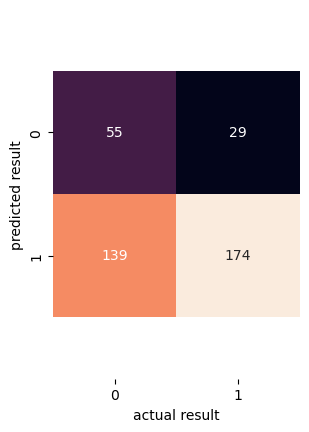

In [93]:
mat = confusion_matrix(pred_log2, y2_test)
sns.heatmap(mat, square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel("actual result")
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=.5
b-=.5
plt.ylim(a,b)
plt.show()
            

In [94]:
tot_mat=sum(sum(mat))
print(classification_report(y2_test,pred_log2))

              precision    recall  f1-score   support

           0       0.65      0.28      0.40       194
           1       0.56      0.86      0.67       203

    accuracy                           0.58       397
   macro avg       0.61      0.57      0.54       397
weighted avg       0.60      0.58      0.54       397



The Logistic Regression Model's performance, with an accuracy of 59% on the training set and 58% on the test set, indicates limited predictive capability. Additionally, the classification report highlights significant challenges in identifying class 0, with low recall (28%) and an F1-score of 40%. These results suggest the model struggles with distinguishing between the two classes effectively, likely due to the dataset's complexity or possible class imbalance.

To address these limitations and improve performance, a Random Forest model will be developed and tested on the dataset.

# Part III: Building the model (Random Forest)

For the model, it was decided to change one variable in the dataset: Household_Size, converting this into categorical values to make the results easier to interpret and understand the effect on the model. This column will be dummified along with the other categorical variables.

First, the categorical variables have to be dummified, beacuse the model can work only with numerical data.

The categorical variables are: 'Household_Size', 'Children_Present', 'Income_Level', 'Weather_Tolerance', 'Activity_Interest', 'HomeState' 

In [99]:
vis_r = pd.get_dummies(vis, drop_first=False,
                      columns=['Household_Size','Children_Present', 'Income_Level',
                               'Weather_Tolerance', 'Activity_Interest', 'HomeState',]).astype('int')
label_encoder = LabelEncoder()
vis_r.head()

,Age_18_34,Distance_to_Park,Preferred_Activity,Household_Size_1.0,Household_Size_2.0,Household_Size_3.0,Household_Size_4.0,Household_Size_5.0,Children_Present_0.0,Children_Present_1.0,...,Activity_Interest_Ice skating,Activity_Interest_Outdoor concerts,HomeState_Connecticut,HomeState_Maine,HomeState_Massachusetts,HomeState_New Hampshire,HomeState_Ontario,HomeState_Quebec,HomeState_Rhode Island,HomeState_Vermont
ID,,,,,,,,,,,,,,,,,,,,,
1,18,67,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,54,79,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
3,87,25,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,73,62,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
5,80,57,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
vis_r.columns

Index(['Age_18_34', 'Distance_to_Park', 'Preferred_Activity',
       'Household_Size_1.0', 'Household_Size_2.0', 'Household_Size_3.0',
       'Household_Size_4.0', 'Household_Size_5.0', 'Children_Present_0.0',
       'Children_Present_1.0', 'Income_Level_High', 'Income_Level_Low',
       'Income_Level_Medium', 'Weather_Tolerance_High',
       'Weather_Tolerance_Low', 'Weather_Tolerance_Moderate',
       'Activity_Interest_Craft fairs', 'Activity_Interest_Holiday shows',
       'Activity_Interest_Ice skating', 'Activity_Interest_Outdoor concerts',
       'HomeState_Connecticut', 'HomeState_Maine', 'HomeState_Massachusetts',
       'HomeState_New Hampshire', 'HomeState_Ontario', 'HomeState_Quebec',
       'HomeState_Rhode Island', 'HomeState_Vermont'],
      dtype='object')

In [101]:
X=vis_r[['Age_18_34', 'Distance_to_Park',
       'Household_Size_1.0', 'Household_Size_2.0', 'Household_Size_3.0',
       'Household_Size_4.0', 'Household_Size_5.0', 'Children_Present_0.0',
       'Children_Present_1.0', 'Income_Level_High', 'Income_Level_Low',
       'Income_Level_Medium', 'Weather_Tolerance_High',
       'Weather_Tolerance_Low', 'Weather_Tolerance_Moderate',
       'Activity_Interest_Craft fairs', 'Activity_Interest_Holiday shows',
       'Activity_Interest_Ice skating', 'Activity_Interest_Outdoor concerts',
       'HomeState_Connecticut', 'HomeState_Maine', 'HomeState_Massachusetts',
       'HomeState_New Hampshire', 'HomeState_Ontario', 'HomeState_Quebec',
       'HomeState_Rhode Island', 'HomeState_Vermont']]

y=vis_r['Preferred_Activity']

In [102]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.4, random_state = 666)

In [103]:
vis.groupby('Preferred_Activity')['Household_Size'].count()

Preferred_Activity
0    437
1    554
Name: Household_Size, dtype: int64

The dataset contains more Outdoor (554) activities than Indoor (437), which can lead to a bias toward predicting Outdoor activities. 

Resampling balances this skewed dataset, ensuring the model trains equally on Indoor and Outdoor activities, improving its ability to predict both classes fairly.

SMOTE (Synthetic Minority Oversampling Technique) was applied to address the class imbalance in the dataset, where Outdoor activities were more prevalent than Indoor. SMOTE generates synthetic samples for the minority class (Indoor activities) by interpolating between existing data points. This oversampling function effectively balances the dataset, ensuring that the Random Forest model trains on an equal number of samples for both Indoor and Outdoor activities. By doing so, SMOTE enhances the model's ability to learn the patterns of both classes, reducing the risk of bias toward the majority class and improving overall predictive performance.

In [105]:
smote = SMOTE(random_state=666)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [106]:
print(Counter(y_train))
print(Counter(y_train_resampled))

Counter({1: 327, 0: 267})
Counter({1: 327, 0: 327})


In [107]:
clf = RandomForestClassifier(random_state=666)
clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=666)

In [108]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [12, 14, 16],
    'max_features': [20, 22, 24],
    'min_samples_leaf': [ 14, 16, 18],
}

In [109]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_resampled, y_train_resampled)
print(CV_rfc.best_params_)

{'max_depth': 12, 'max_features': 22, 'min_samples_leaf': 14, 'n_estimators': 50}


These parameters make a gap between train and test accuracies, so some parameters were changed in order to find the best result

In [111]:
clf=RandomForestClassifier(n_estimators=200,
                           max_depth=12, max_features=24, min_samples_leaf=18, random_state=666)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=12, max_features=24, min_samples_leaf=18,
                       n_estimators=200, random_state=666)

In [112]:
feat_imp = pd.DataFrame(list(zip(clf.feature_importances_, X_train_resampled)))
feat_imp.columns = ['feature importance', 'feature']
feat_imp = feat_imp.sort_values(by='feature importance', ascending=False)
feat_imp

,feature importance,feature
18,0.168968,Activity_Interest_Outdoor concerts
7,0.150853,Children_Present_0.0
0,0.144603,Age_18_34
12,0.117768,Weather_Tolerance_High
1,0.110161,Distance_to_Park
17,0.085584,Activity_Interest_Ice skating
15,0.033956,Activity_Interest_Craft fairs
11,0.032013,Income_Level_Medium
14,0.024268,Weather_Tolerance_Moderate
8,0.022907,Children_Present_1.0


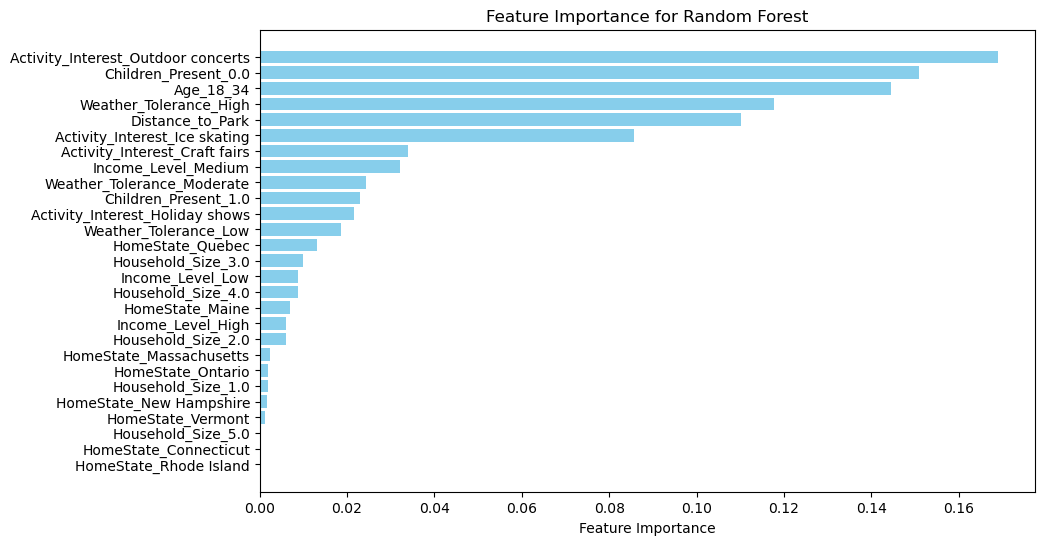

In [113]:
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.gca().invert_yaxis()
plt.show()

Feature importance analysis allows us to identify which variables significantly impact the decision-making process and which contribute minimally.

The feature importance table shows that Activity Inteset: Outdoor Concerts, Age 18-34, and Children Present - 0 have a strong relationship with Preferred Activity and significantly influence the decision. Other impactful features include Distance to Park and Weather Tolerance: High. Conversely, features like HomeState: Rhode Island and HomeState: Connecticut rank among the least impactful, suggesting they contribute minimally to predicting visitors' preferences.

It’s important to understand that feature importance reflects the overall influence of a variable on the model’s predictions, without specifying the direction or cause of the relationship. For example, Age 18-34 has been identified as a significant predictor of activity preference, with younger individuals in this age range more likely to prefer outdoor activities. However, feature importance alone doesn’t tell us whether increasing the number of people in this age group would directly cause an increase in outdoor activity preferences.

In [115]:
pred=clf.predict(X_train_resampled)
accuracy_score(y_train_resampled, pred)

0.72782874617737

In [116]:
pred2= clf.predict(X_test)
accuracy_score(y_test, pred2)

0.7153652392947103

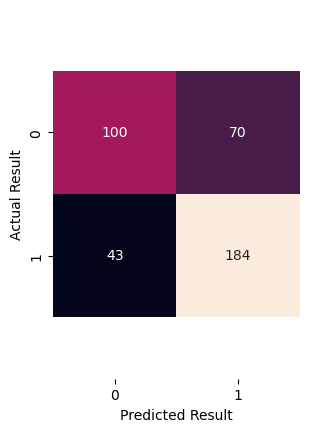

In [117]:
predictions = clf.predict(X_test)
mat2 = confusion_matrix(y_test, predictions)
sns.heatmap(mat2, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [118]:
mat2 = confusion_matrix(pred2, y_test)
tot_mat=sum(sum(mat2))
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       170
           1       0.72      0.81      0.77       227

    accuracy                           0.72       397
   macro avg       0.71      0.70      0.70       397
weighted avg       0.71      0.72      0.71       397



The Random Forest model achieves an accuracy of almost 72% on the test set, indicating it generalizes reasonably well. After applying resampling to the training data to address class imbalance, the model was trained on an equal number of indoor and outdoor activity samples. Despite the class balancing, the model performs better at predicting outdoor activities compared to indoor ones.

From the confusion matrix, the model correctly predicted 100 indoor activities (class 0) and 184 outdoor activities (class 1). However, it misclassified 70 indoor activities as outdoor and 43 outdoor activities as indoor, showing a stronger performance in predicting outdoor activities. In other words, while the model reliably identifies outdoor activities, it struggles more with indoor activities, often labeling them as outdoor.

The model achieves a recall of 81% and an F1-score of 0.77 for outdoor activities but has a lower recall of 59% and an F1-score of 0.64 for indoor activities. This discrepancy, despite the resampling technique, is still likely due to the inherent difficulty of predicting indoor activities with fewer examples in the original dataset. The resampling effectively balanced the classes, but the model still benefits from the larger number of outdoor activity cases, which improves its ability to correctly predict outdoor activities over indoor ones.

# Part IV: Choosing the Model to Proceed

The Random Forest model demonstrates superior performance compared to the Logistic Regression model in both accuracy and classification metrics. With its ability to handle non-linear relationships and its robustness against overfitting, the **Random Forest model is better suited for this problem**. As a result, it will be used in the Prediction section to deliver more reliable and precise results.

# Part V: Prediction (Random Forest Model)

In [123]:
X_train.columns

Index(['Age_18_34', 'Distance_to_Park', 'Household_Size_1.0',
       'Household_Size_2.0', 'Household_Size_3.0', 'Household_Size_4.0',
       'Household_Size_5.0', 'Children_Present_0.0', 'Children_Present_1.0',
       'Income_Level_High', 'Income_Level_Low', 'Income_Level_Medium',
       'Weather_Tolerance_High', 'Weather_Tolerance_Low',
       'Weather_Tolerance_Moderate', 'Activity_Interest_Craft fairs',
       'Activity_Interest_Holiday shows', 'Activity_Interest_Ice skating',
       'Activity_Interest_Outdoor concerts', 'HomeState_Connecticut',
       'HomeState_Maine', 'HomeState_Massachusetts', 'HomeState_New Hampshire',
       'HomeState_Ontario', 'HomeState_Quebec', 'HomeState_Rhode Island',
       'HomeState_Vermont'],
      dtype='object')

In [124]:
X_test.columns

Index(['Age_18_34', 'Distance_to_Park', 'Household_Size_1.0',
       'Household_Size_2.0', 'Household_Size_3.0', 'Household_Size_4.0',
       'Household_Size_5.0', 'Children_Present_0.0', 'Children_Present_1.0',
       'Income_Level_High', 'Income_Level_Low', 'Income_Level_Medium',
       'Weather_Tolerance_High', 'Weather_Tolerance_Low',
       'Weather_Tolerance_Moderate', 'Activity_Interest_Craft fairs',
       'Activity_Interest_Holiday shows', 'Activity_Interest_Ice skating',
       'Activity_Interest_Outdoor concerts', 'HomeState_Connecticut',
       'HomeState_Maine', 'HomeState_Massachusetts', 'HomeState_New Hampshire',
       'HomeState_Ontario', 'HomeState_Quebec', 'HomeState_Rhode Island',
       'HomeState_Vermont'],
      dtype='object')

In [125]:
vis[vis['HomeState'] == 'Massachusetts'].describe()

,Household_Size,Age_18_34,Distance_to_Park,Children_Present,Preferred_Activity
count,129.000000,129.000000,129.00000,129.000000,129.000000
mean,2.984496,50.503876,72.05124,0.302326,0.534884
std,1.138698,28.604011,13.43358,0.461056,0.500726
min,1.000000,0.000000,50.51000,0.000000,0.000000
25%,2.000000,24.000000,60.75000,0.000000,0.000000
50%,3.000000,51.000000,70.92000,0.000000,1.000000
75%,4.000000,76.000000,83.26000,1.000000,1.000000
max,5.000000,99.000000,96.81000,1.000000,1.000000


In [126]:
new_family = pd.DataFrame([{
    'Age_18_34': 33,
    'Distance_to_Park': 90,
    'Household_Size_1.0': 0,
    'Household_Size_2.0': 0,
    'Household_Size_3.0': 1,
    'Household_Size_4.0': 0,
    'Household_Size_5.0': 0,
    'Children_Present_0.0': 0,
    'Children_Present_1.0': 1,
    'Income_Level_High': 0,
    'Income_Level_Low': 0,
    'Income_Level_Medium': 1,
    'Weather_Tolerance_High':0,
    'Weather_Tolerance_Low':0,
    'Weather_Tolerance_Moderate':1,
    'Activity_Interest_Craft fairs':0,
    'Activity_Interest_Holiday shows': 0,
    'Activity_Interest_Ice skating': 0,
    'Activity_Interest_Outdoor concerts': 1,
    'HomeState_Connecticut': 0,
    'HomeState_Maine': 0,
    'HomeState_Massachusetts': 1,
    'HomeState_New Hampshire': 0,
    'HomeState_Ontario': 0,
    'HomeState_Quebec': 0,
    'HomeState_Rhode Island': 0,
    'HomeState_Vermont': 0
}])

missing_cols = set(X_train.columns) - set(new_family.columns)
for c in missing_cols:
    new_family[c] = 0

new_family = new_family[X_train.columns]

prediction = clf.predict(new_family)

if prediction[0] == 0:
    print("The model predicts the family will prefer indoor activities.")
else:
    print("The model predicts the family will prefer outdoor activities.")

The model predicts the family will prefer outdoor activities.


Based on the model’s prediction, the family is likely to prefer Outdoor activities. This prediction is based on several key factors in their profile:

The family consists of a household of 3 (excluding children), with 33% of the household members in the 18-34 age range, which is generally associated with a preference for more active or social activities. The family also shows an interest in Outdoor concerts, which further suggests a preference for outdoor events. Additionally, they have a high income level, which might provide greater access to outdoor activities.

"The family has a Moderate weather tolerance and is from Massachusetts, where outdoor activities are often preferred during favorable weather conditions. These combined factors lead the model to predict that the family will favor outdoor activities over indoor ones.

# Part VI: Recommendations

1. Based on the **Random Forest Model** results :

The results of the Random Forest model provide valuable insights into the factors influencing visitors' activity preferences at Lobster Land. The model demonstrates that features such as Activity Interest: Outdoor Concerts, Children Present: 0, and Age 18-34 are key predictors of whether visitors prefer indoor or outdoor activities. These findings highlight the importance of understanding visitor demographics, family status, and activity interests when designing marketing strategies and improving the park experience.

For instance, the high importance of Activity Interest: Outdoor Concerts suggests that outdoor concerts significantly attract visitors. To capitalize on this, Lobster Land could enhance marketing efforts by promoting high-energy, popular outdoor concerts, perhaps featuring well-known local bands or famous artists. Partnering with renowned musicians or hosting music festivals could draw a larger crowd, creating a vibrant atmosphere. Additionally, incorporating dance performances or live entertainment from well-known dance troupes could further elevate the experience, making it more exciting for attendees.

The feature Children Present: 0 indicates that families without children tend to favor outdoor activities. Lobster Land could target this group with outdoor adventure experiences like ice skating, snowmobile races, or exclusive couples’ nights. Offering bundled tickets for adults only or special promotions during off-peak hours might appeal to this demographic, providing a more tailored experience for visitors without children.

Additionally, Age 18-34 continues to be an important predictor, suggesting that younger visitors, such as students, are more likely to enjoy outdoor activities. Lobster Land could create unique, outdoor events like music festivals or adventure sports competitions specifically designed for this age group. Leveraging social media to promote these events can help attract a high volume of visitors from this demographic. Since Lobster Land is working with Disney, this partnership offers a great opportunity to create engaging advertisements that appeal to younger audiences. Inviting popular bloggers or local influencers, especially those with ties to Disney or the entertainment industry, could amplify the promotional efforts. This approach would allow Lobster Land to tap into an already established fan base, boosting attendance and generating excitement for the park's outdoor activities.

The model also highlights opportunities for improvement. For example, it initially struggled to predict indoor activity preferences accurately due to the class imbalance in the dataset, with more outdoor activities than indoor. To address this, SMOTE (Synthetic Minority Oversampling Technique) was applied during training, generating synthetic samples for indoor activities to balance the dataset. While this improved the model's ability to predict both classes, the challenge of attracting visitors to indoor activities remains. This suggests that Lobster Land could explore ways to diversify its indoor offerings or improve the visibility of these attractions. Marketing efforts might include highlighting unique indoor events such as themed dining experiences or virtual reality shows. Offering discounts at bad weather days could attract more visitors to indoor activities.

2. In **Part II (before the Logistic Regression Model was built)** after dummifying variables were determined some insights about Preferred Activities. For Example:
   
Maine stands out as the most significant contributor to Lobster Land's visitor base, with 35% of attendees hailing from the state for both indoor and outdoor activities. This aligns with the park's location, emphasizing its strong appeal as a local attraction. Visitors from neighboring states such as Massachusetts, Vermont, and New Hampshire comprise a smaller but notable share of attendees, highlighting opportunities for targeted marketing in these regions. For example, localized campaigns, partnerships with regional travel agencies, or special “neighbor state” discounts could encourage more visitors from these areas.

The analysis of families with children presents another key insight. Indoor activities attract a higher percentage of families with children (40%) compared to outdoor activities (23%). This suggests that families with children may find indoor activities more convenient or better suited to their needs, possibly due to safety or weather considerations. To cater to this audience, Lobster Land could expand its family-friendly indoor offerings, such as interactive exhibits, child-friendly entertainment, or dining options tailored for kids. At the same time, the park could consider enhancing its outdoor attractions to include features like child-safe play areas or guided family-friendly activities, making them more appealing to families with children.



   